In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import pickle
import os
import shutil
import matplotlib.pyplot as plt

In [17]:
def get_train_split(timestep):

    pickle_dir = '/home/samuel-linux/PycharmProjects/Personal/FantasyBasketball/Data/pickles/roto/shifted'
    split_dict = pickle.load(open(f'{pickle_dir}/{timestep}-TrainTestSplit.p', 'rb'))
        
    x_train, y_train = split_dict['x_train'], split_dict['y_train'] 
    x_test, y_test = split_dict['x_test'], split_dict['y_test']
    x_val, y_val  = split_dict['x_val'], split_dict['y_val']
    
    columns = [i for i in x_train.columns if i != 'Player']
    x_train = x_train[columns]
    x_test = x_test[columns]
    x_val = x_val[columns]
    return x_train, y_train, x_test, y_test, x_val, y_val

x_train, y_train, x_test, y_test, x_val, y_val = get_train_split(3)  

In [18]:
x_train

,Team,Against,Home,GameID,GameTime,TeamPoints,OppPoints,Starting,Minutes,Appeared,...,TripleD,FDSal,FDChange,DKSal,DKChange,DDSal,DDChange,FDP_1,FDP_2,FDP_3
566,lal,det,A,20170208-lal-det,19.5,102.0,121.0,0.0,20.650000,1.0,...,0.0,6300.0,0.0,5500.0,-400.0,11850.0,-650.0,28.4,30.8,22.4
501,cle,okc,A,20170209-cle-okc,20.0,109.0,118.0,1.0,34.400000,1.0,...,0.0,8400.0,0.0,8300.0,600.0,17050.0,-50.0,40.5,30.7,0.0
508,cle,bkn,H,20161223-bkn-cle,19.5,119.0,99.0,1.0,26.450000,1.0,...,0.0,7500.0,200.0,7800.0,300.0,16450.0,1450.0,55.7,39.5,50.2
674,cle,gsw,H,20161225-gsw-cle,14.5,109.0,108.0,1.0,43.883333,1.0,...,0.0,8000.0,500.0,7700.0,-100.0,15950.0,-500.0,45.0,55.7,39.5
669,dal,uta,A,20161102-dal-uta,21.0,81.0,97.0,0.0,14.783333,1.0,...,0.0,3800.0,0.0,3400.0,-500.0,6100.0,-450.0,4.6,9.5,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,mem,sas,A,20170425-mem-sas,21.0,103.0,116.0,1.0,32.016667,1.0,...,0.0,3700.0,0.0,3700.0,100.0,5750.0,0.0,15.6,11.8,12.0
184,lal,mem,A,20161203-lal-mem,20.0,100.0,103.0,0.0,31.566667,1.0,...,0.0,5200.0,0.0,5700.0,-100.0,8750.0,50.0,16.2,33.5,25.6
255,dal,por,H,20161104-por-dal,20.5,95.0,105.0,0.0,0.566667,1.0,...,0.0,3500.0,0.0,3000.0,0.0,5000.0,0.0,0.0,0.0,0.0
115,lal,mia,H,20170106-mia-lal,22.5,127.0,100.0,0.0,23.583333,1.0,...,0.0,4900.0,0.0,4800.0,-100.0,12350.0,-50.0,16.1,20.2,9.5


## Linear Regression

In [3]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

Text(0, 0.5, 'Residual')

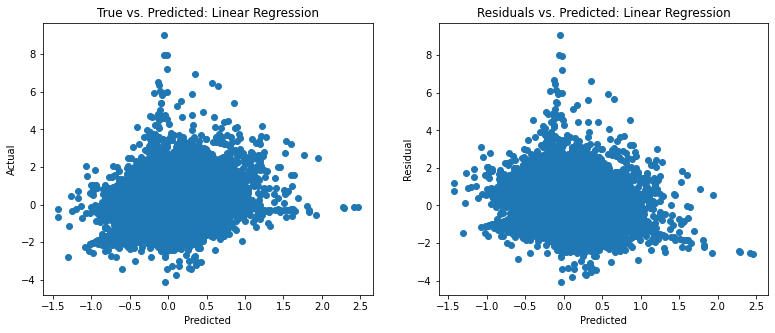

In [4]:
y_pred = lr.predict(x_test).squeeze()
residuals = y_test.FDP.values - y_pred

fig, ax = plt.subplots(1,2, figsize = (13,5))
ax[0].scatter(y_pred, y_test.FDP.values)
ax[0].set_title('True vs. Predicted: Linear Regression')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[1].scatter(y_pred, residuals)
ax[1].set_title('Residuals vs. Predicted: Linear Regression')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Residual')

## Decision Tree

In [5]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

Text(0, 0.5, 'Residual')

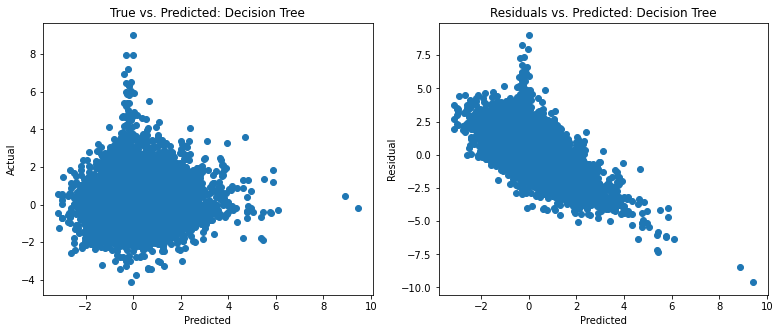

In [6]:
y_pred = dt.predict(x_test)
residuals = y_test.FDP.values - y_pred

fig, ax = plt.subplots(1,2, figsize = (13,5))
ax[0].scatter(y_pred, y_test.FDP.values)
ax[0].set_title('True vs. Predicted: Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[1].scatter(y_pred, residuals)
ax[1].set_title('Residuals vs. Predicted: Decision Tree')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Residual')

## Neighbor Regressor

In [7]:
kn = KNeighborsRegressor(10)
kn.fit(x_test, y_test)

KNeighborsRegressor(n_neighbors=10)

Text(0, 0.5, 'Residual')

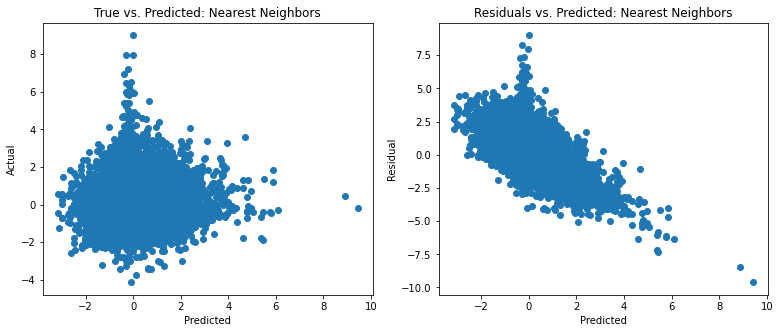

In [8]:
y_pred = dt.predict(x_test)
residuals = y_test.FDP.values - y_pred

fig, ax = plt.subplots(1,2, figsize = (13,5))
ax[0].scatter(y_pred, y_test.FDP.values)
ax[0].set_title('True vs. Predicted: Nearest Neighbors')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[1].scatter(y_pred, residuals)
ax[1].set_title('Residuals vs. Predicted: Nearest Neighbors')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Residual')